# Character Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

In [11]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  1.1.3


In [3]:
# helper function to load KMNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Set as seed for the random generator your Student ID (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [4]:
#İsmail Deha Köse
ID = 2072544
np.random.seed(ID)

In [5]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the K-MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [6]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [59 51 58 46 62 60 71 55 63 75]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [59 51 58 46 62 60 71 55 63 75]


In [7]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


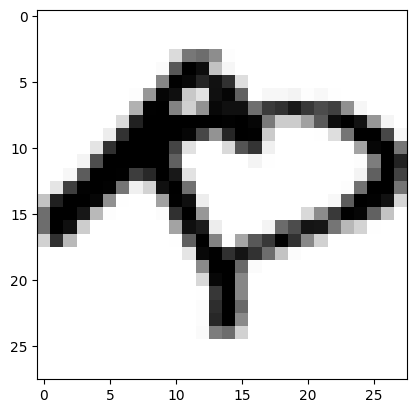

LABEL: 7
INPUT:


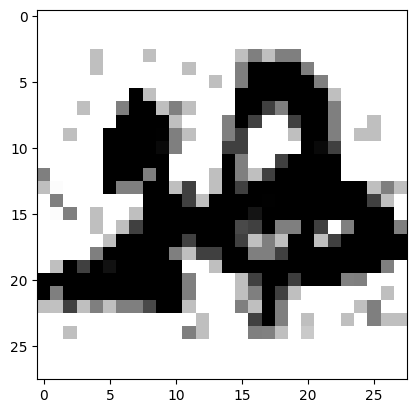

LABEL: 0
INPUT:


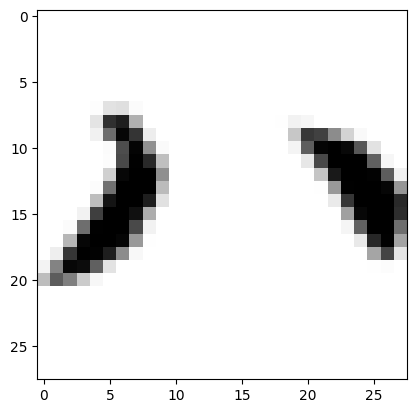

LABEL: 5


In [8]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [12]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,), (20,20,), (40,20,10) ]}

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

grid_cv = GridSearchCV(mlp, parameters, cv=5)
grid_cv.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:", grid_cv.best_params_)


print("Score with best parameters:", grid_cv.best_score_)


print("\nAll scores on the grid:")
pd.DataFrame(grid_cv.cv_results_)

RESULTS FOR NN

Best parameters set found: {'hidden_layer_sizes': (40,)}
Score with best parameters: 0.7133333333333334

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.565970,0.041141,0.000999,0.000632,"(10,)","{'hidden_layer_sizes': (10,)}",0.700000,0.625000,0.725000,0.641667,0.683333,0.675000,0.036893,4
1,0.568837,0.019770,0.000799,0.000400,"(20,)","{'hidden_layer_sizes': (20,)}",0.691667,0.616667,0.750000,0.650000,0.708333,0.683333,0.046248,2
2,0.605733,0.026596,0.001000,0.000632,"(40,)","{'hidden_layer_sizes': (40,)}",0.733333,0.625000,0.758333,0.708333,0.741667,0.713333,0.047022,1
3,0.405667,0.023120,0.001222,0.000389,"(20, 20)","{'hidden_layer_sizes': (20, 20)}",0.700000,0.666667,0.725000,0.641667,0.683333,0.683333,0.028382,2
4,0.638007,0.111406,0.002189,0.000982,"(40, 20, 10)","{'hidden_layer_sizes': (40, 20, 10)}",0.675000,0.575000,0.666667,0.683333,0.625000,0.645000,0.040346,5


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [22]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 64, 128, 256, 480, 520], 'hidden_layer_sizes': [(40,)]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

# recall to use cv=kf to use the k-fold subdivision seen in the lectures
clf = GridSearchCV(mlp, parameters, cv=kf)
clf.fit(X_train,y_train)


print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
pd.DataFrame(clf.cv_results_)



C:\Users\dehak\anaconda3\envs\Run\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:621: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\dehak\anaconda3\envs\Run\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:621: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\dehak\anaconda3\envs\Run\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:621: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\dehak\anaconda3\envs\Run\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:621: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\dehak\anaconda3\envs\Run\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:621: UserWarning: Got `

RESULTS FOR NN

Best parameters set found:
{'batch_size': 32, 'hidden_layer_sizes': (40,)}
Score with best parameters:
0.7300000000000001

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,35.601669,14.445111,0.001599,0.000490,1,"(40,)","{'batch_size': 1, 'hidden_layer_sizes': (40,)}",0.100000,0.100000,0.083333,0.041667,0.100000,0.085000,0.022608,7
1,0.934595,0.036403,0.002206,0.000396,32,"(40,)","{'batch_size': 32, 'hidden_layer_sizes': (40,)}",0.758333,0.675000,0.791667,0.733333,0.691667,0.730000,0.042687,1
2,0.675622,0.089001,0.002413,0.000793,64,"(40,)","{'batch_size': 64, 'hidden_layer_sizes': (40,)}",0.725000,0.641667,0.758333,0.741667,0.716667,0.716667,0.040139,2
3,0.579166,0.036982,0.001602,0.000486,128,"(40,)","{'batch_size': 128, 'hidden_layer_sizes': (40,)}",0.725000,0.641667,0.775000,0.708333,0.716667,0.713333,0.042687,3
4,0.762021,0.049343,0.002223,0.000774,256,"(40,)","{'batch_size': 256, 'hidden_layer_sizes': (40,)}",0.741667,0.625000,0.775000,0.708333,0.700000,0.710000,0.050111,4
5,0.763740,0.030390,0.001589,0.000502,480,"(40,)","{'batch_size': 480, 'hidden_layer_sizes': (40,)}",0.741667,0.625000,0.766667,0.691667,0.683333,0.701667,0.049272,5
6,0.781473,0.032653,0.001565,0.000465,520,"(40,)","{'batch_size': 520, 'hidden_layer_sizes': (40,)}",0.741667,0.625000,0.766667,0.691667,0.683333,0.701667,0.049272,5


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]

Depends on the training data, The best parameters such as number of layers, layer sizes, and batch sizes can change. The worst test score belongs to 3 hidden layers with 30,30,20 neurons respectively, because the data is quite cleaner and simpler than real-life data examples. It means that the model with (40,20,10) hidden layers is too large for the training data. We can see that the best score belongs to the model that has 1 layer and 40 neurons and it continues as follows in order from best to worst: (20,), (20, 20), (10,), (40, 20, 10).

For batch-size, batch-size 32 gives the best score and the worst one is batch-size 1. About the other scores of batch-sizes, they are quite close to each other and also close to the best score. If Batch size is 1, it may cause the model to learn the noise. Because different data are used each time in the learning process. Depending on the data set, the effect of batch size on training time may vary. For example, setting the batch size to 1 in a small data set or setting the batch size to the data set size in a large data set may extend the training time. In this example, we can see that the batch is 1, while the training time is longer. Because our training data set contains 600 data, which shows that it is a small training data set.

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 100 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 0.86 sec

Training MLP of size (20,) ...
Done, training time: 0.85 sec

Training MLP of size (40,) ...
Done, training time: 0.82 sec

Training MLP of size (20, 20) ...
Done, training time: 0.53 sec

Training MLP of size (40, 20, 10) ...
Done, training time: 1.11 sec



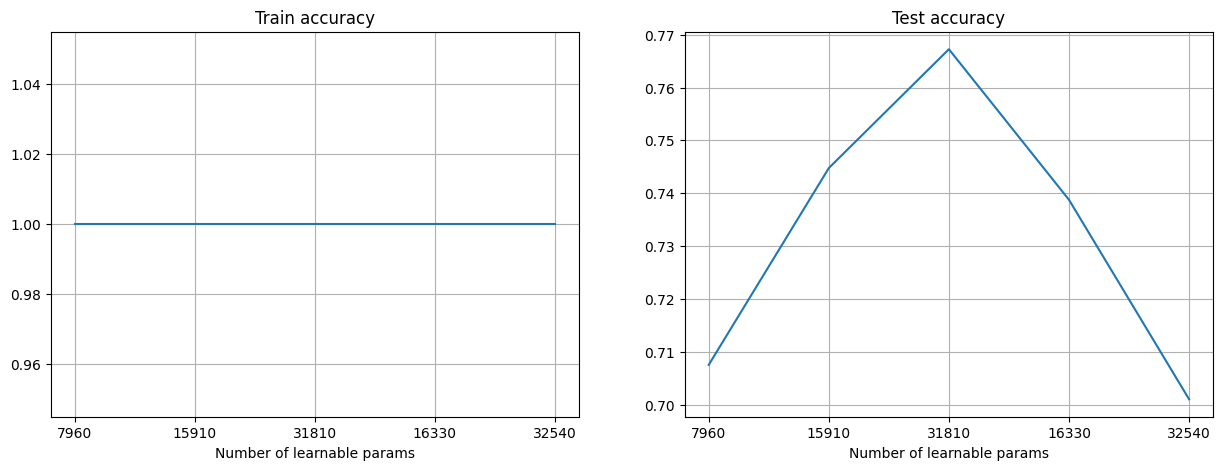

In [23]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (40,), (20,20,), (40,20,10)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(max_iter=300, hidden_layer_sizes=hl_size, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)
    
    mlp.fit(X_train,y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]

The model that has hidden layer size with (10,) overfits the training data, because there is a big difference between training accuracy and test accuracy, we see that test accuracy is nearly 0,71 while the training accuracy is almost 1. Models with (20,), (40,) and (20,20) are quite acceptable, there is no overfitting issue too much (but still there is overfitting). 3 layers and 40,20,10 neurons respectively are not the efficient parameters for this training dataset, because we can see from the plotting that the training accuracy low according to the other parameters, the model with these hidden layer sizes (40,20,10) is underfitting slightly.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 100 iterations. 

C:\Users\dehak\anaconda3\envs\Run\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


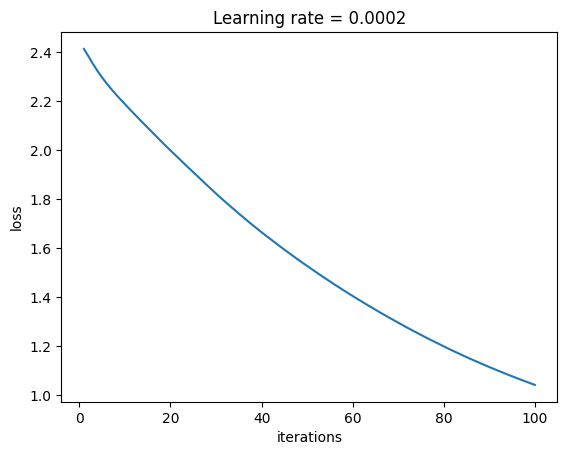

C:\Users\dehak\anaconda3\envs\Run\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


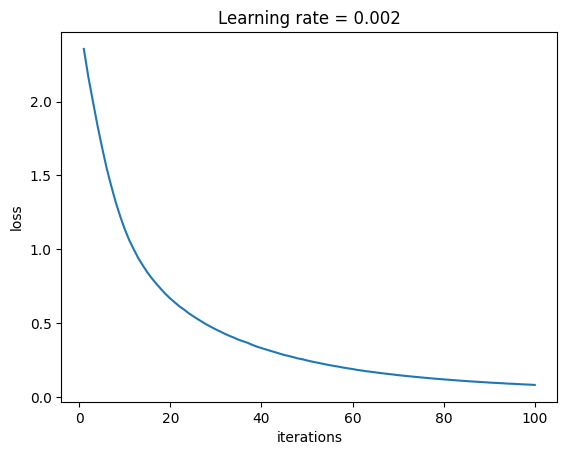

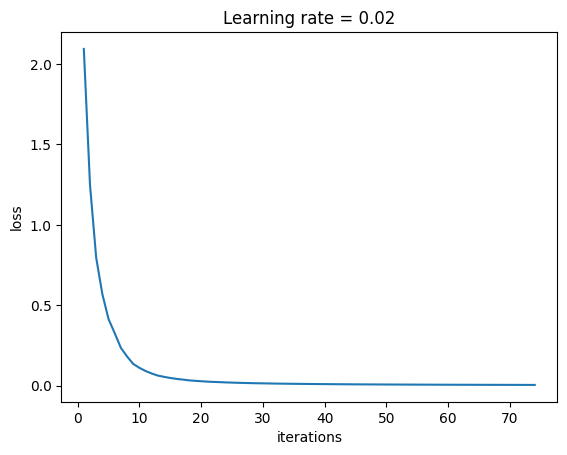

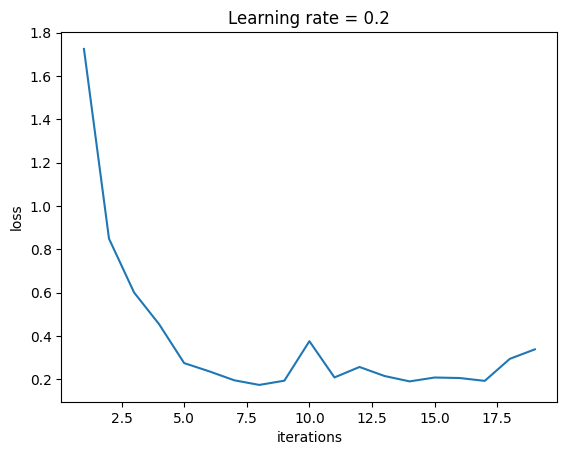

RESULTS FOR NN

Best parameters set found:  0.02
Score with best parameters:  0.7655


In [28]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.0002, 0.002, 0.02, 0.2]
lr_list = [10**exp*2 for exp in range(-4,0)]
scores = []
for i in lr_list:
    mlp = MLPClassifier(max_iter=100,batch_size=32, hidden_layer_sizes=(40,), alpha=1e-4, solver='sgd',
                        tol=1e-4, random_state=ID, learning_rate_init=i)
    mlp.fit(X_train,y_train)  
    
    iterations = []
    for j in range(0, len(mlp.loss_curve_)):
        iterations.append(j+1)
        
    score = mlp.score(X_test,y_test)
    scores.append(score)
        
    plt.ylabel('loss')
    plt.xlabel('iterations')
    plt.title("Learning rate = " + str(i))
    plt.plot(iterations,mlp.loss_curve_)
    plt.show()

best_score = max(scores)
index_best_param = scores.index(max(scores))
    
print ('RESULTS FOR NN\n')

print("Best parameters set found: ", lr_list[index_best_param])

print("Score with best parameters: ", best_score)



### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]

According to the plottings, we can say that the most stable curves are with 0.002 and 0.02 learning rates. The worst one in terms of stability is with 0.2 learning rate. We can see that the existing zigzags on the third plotting. In terms of speed of convergence, from best to bad, the results: 0.02 lr, 0.002, 0.2 and 0.002 respectively. The plottings depict that the model with 0.02 lr reaches the best score with 25 iterations approximately. 

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case (you can run the training for 500 iterations).


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.234500


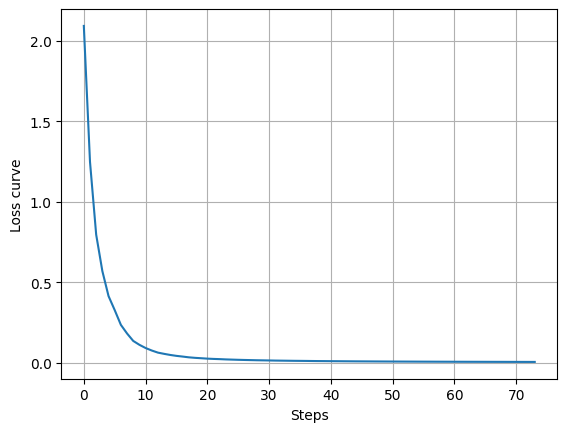

In [29]:
#get training and test error for the best NN model from CV

best_model = MLPClassifier(max_iter=500, alpha=1e-4, solver='sgd', tol=1e-4,
                           random_state=ID, hidden_layer_sizes=(40, ), batch_size=32, learning_rate_init=0.02)
best_model.fit(X_train,y_train)

training_error=1-best_model.score(X_train,y_train)
test_error=1-best_model.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(best_model.loss_curve_)
plt.xlabel('Steps')
plt.ylabel('Loss curve')
plt.grid(True)

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [30]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [377 413 409 444 383 394 403 385 403 389]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [31]:
# use best architecture and params from before

best_model_2 = MLPClassifier(max_iter=50, alpha=1e-4, solver='sgd',tol=1e-4, random_state=ID,
                             hidden_layer_sizes=(40, ), batch_size=32, learning_rate_init=0.02,verbose=True)
best_model_2.fit(X_train,y_train)

print ('\nRESULTS FOR NN\n')

#get training and test error for the NN

training_error=1-best_model_2.score(X_train,y_train)
test_error=1-best_model_2.score(X_test,y_test)

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)

Iteration 1, loss = 1.08837927
Iteration 2, loss = 0.56262182
Iteration 3, loss = 0.43010975
Iteration 4, loss = 0.34673503
Iteration 5, loss = 0.27256683
Iteration 6, loss = 0.22297041
Iteration 7, loss = 0.17271645
Iteration 8, loss = 0.13959152
Iteration 9, loss = 0.11164772
Iteration 10, loss = 0.08840943
Iteration 11, loss = 0.06973328
Iteration 12, loss = 0.05332521
Iteration 13, loss = 0.04283778
Iteration 14, loss = 0.03415673
Iteration 15, loss = 0.02901606
Iteration 16, loss = 0.02391468
Iteration 17, loss = 0.02008511
Iteration 18, loss = 0.01726312
Iteration 19, loss = 0.01592123
Iteration 20, loss = 0.01386013
Iteration 21, loss = 0.01269024
Iteration 22, loss = 0.01156075
Iteration 23, loss = 0.01064186
Iteration 24, loss = 0.00987166
Iteration 25, loss = 0.00906155
Iteration 26, loss = 0.00857572
Iteration 27, loss = 0.00815153
Iteration 28, loss = 0.00756774
Iteration 29, loss = 0.00718065
Iteration 30, loss = 0.00683779
Iteration 31, loss = 0.00649729
Iteration 32, los

C:\Users\dehak\anaconda3\envs\Run\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]

Training the model with the best parameters and with less number of data gives slightly better test error than with a large number of data. But we need to consider different things. We trained less data with 500 max iter(stopping earlier but still higher than 50) while we trained the large data with 50 max iter. Also when I try with different seeds, as I see, most of the time the model with a large number of samples gives higher accuracy. From that, we can see the number of data points is very important while building our model and choosing methods/parameters

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


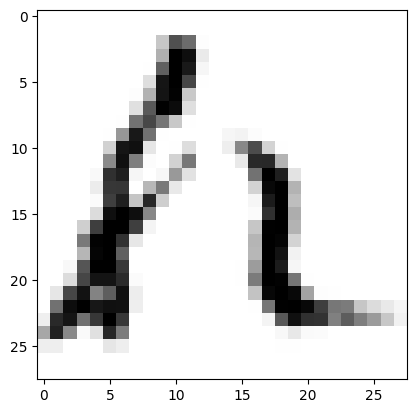

LABEL: 8
large_NN_prediction:  8
NN_prediction:  4
index:  1


In [34]:
NN_prediction = best_model.predict(X_test)
large_NN_prediction = best_model_2.predict(X_test)

for i in range(len(X_test)):
    if NN_prediction[i] != y_test[i] and large_NN_prediction[i] == y_test[i]:
        plot_input(X_test,y_test,i)
        print("large_NN_prediction: ", large_NN_prediction[i])
        print("NN_prediction: ", NN_prediction[i])
        print("index: ", i)
        break
       

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


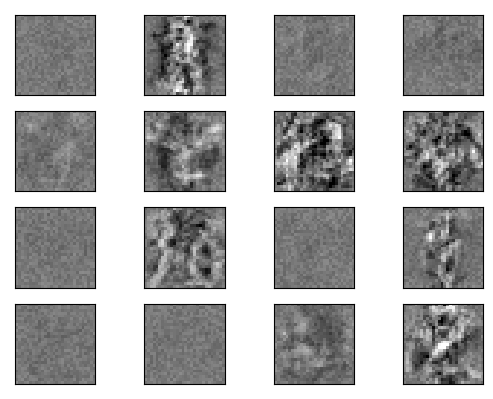

Weights with 4000 data points:


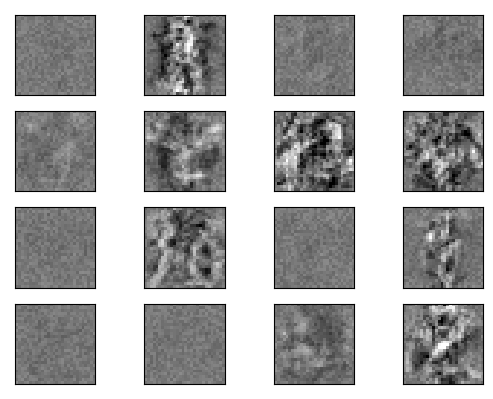

In [36]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]

We can see that some of the letters can be recognized easier than the others. Also we can not see any letters on some of the plottings. Almost nothing can be understood via looking at images of weights except some weak boundries of the same 1-2 classes.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [37]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

best_SVM = SVC(C=50, gamma=0.005, kernel = 'rbf')
best_SVM.fit(X_train,y_train)

print ('RESULTS FOR SVM')

SVM_training_error =  1 - best_SVM.score(X_train,y_train)

print("Training error SVM:")
print(SVM_training_error)

SVM_test_error = 1 - best_SVM.score(X_test,y_test)
print("Test error SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training error SVM:
0.0
Test error SVM:
0.09860000000000002


In [38]:
from sklearn import linear_model

regL2 = linear_model.LogisticRegression(C = 1)
regL2.fit(X_train,y_train)

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error = 1 - regL2.score(X_train,y_train)
test_error =  1 - regL2.score(X_test,y_test)

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.033400
Test error (reg): 0.248400


C:\Users\dehak\anaconda3\envs\Run\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]

SVM achieves the best results, then Logistic Regression follows it. MLP with the 600 data and 4000 data have the worst results according to the SVM and Logistic Regression. We need to consider the dataset and the parameters we tested. Methods can achieve better results, if we keep trying to change the parameters or training data size.

## QUESTION 7

What are the different ways in which you can improve the results obtained for NN? List and justify some of them.

##### [ANSWER TO QUESTION 7]

-Larger and more diverse training dataset
-More layers and/or more units in each layer
-Tune the hyperparameters
-Using regularization techniques
-Different optimization algorithm
-Different activation function


In [ ]:
# Tune the hyperparameters using grid search
param_grid = {'learning_rate_init': [0.01, 0.02, 0.05],
              'batch_size': [16, 32, 64],
              'alpha': [1e-3, 1e-4, 1e-5]}

grid_search = GridSearchCV(best_model_2, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model_3 = grid_search.best_estimator_

# Different regularization techniques
best_model_4 = MLPClassifier(max_iter=50, alpha=1e-4, solver='adam',tol=1e-4, random_state=ID,
                             hidden_layer_sizes=(40, 40), batch_size=32, learning_rate_init=0.02,
                             dropout=0.5, verbose=True)
best_model_4.fit(X_train, y_train)

# Different optimization algorithm
best_model_5 = MLPClassifier(max_iter=50, alpha=1e-4, solver='adam',tol=1e-4, random_state=ID,
                             hidden_layer_sizes=(40, 40), batch_size=32, learning_rate_init=0.02,verbose=True)
best_model_5.fit(X_train, y_train)

# Different activation function
best_model_6 = MLPClassifier(max_iter=100, alpha=1e-4, solver='adam',tol=1e-4, random_state=ID,
                             hidden_layer_sizes=(40,), batch_size=32, learning_rate_init=0.02,
                             activation='relu', verbose=True)
best_model_6.fit(X_train, y_train)